### Working with Mnist dataset using Pytorch

In [1]:
# Importing required libraries
import torch
import torchvision
from torchvision import transforms, datasets

##### Downloading the dataset

In [2]:
# Loading the dataset
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw




Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw




Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [3]:
# Creating train and test sets
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
# Trying to visualize the data
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
# Unpacking the data
x, y = data[0][0], data[1][0]
print(y)
print(x.shape)

tensor(5)
torch.Size([1, 28, 28])


- As seen above, the data is in the form of a tensor of size 1x28x28 and not in an image format.
- So, we need to convert it into an image format (1x28x28) -> (28x28)
- view() function is used to reshape the tensor in pytorch. Works similar to reshape() in numpy.

In [8]:
import matplotlib.pyplot as plt

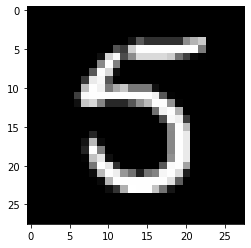

In [9]:
# Visualizing the data
plt.imshow(data[0][0].view(28, 28), cmap='gray')
plt.show()

##### Balancing the dataset
- If the dataset is not balanced, the model will be biased towards the class which has more data.


In [10]:
# Checking the balance of the dataset
total = 0
counter_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0} # Dictionary to store the count of each digit

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)
print(total)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
60000


- We can see that the dataset is not balanced. There are more images of 1 than any other digit.
- So, we need to balance the dataset.

In [12]:
# Balancing the dataset
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100} %") # Printing the percentage of each digit in the dataset


0: 9.871666666666666 %
1: 11.236666666666666 %
2: 9.93 %
3: 10.218333333333334 %
4: 9.736666666666666 %
5: 9.035 %
6: 9.863333333333333 %
7: 10.441666666666666 %
8: 9.751666666666667 %
9: 9.915000000000001 %


- The lowest percentage is 9% and the highest is just over 11%.
- This should be just fine.
- We could balance this perfectly, but there's likely no need for that

##### Building the model

In [13]:
# Importing llbraries for model building
import torch.nn as nn
import torch.nn.functional as F

In [14]:
# Building the model
class Net(nn.Module):
    def __init__(self):
        super().__init__()  # Initializing the nn.Module
        self.fc1 = nn.Linear(in_features=28*28,
                             out_features=64) # Input layer of 28*28 neurons & output layer of 64 neurons(Fully connected layer)
        self.fc2 = nn.Linear(64, 64) # Hidden layer
        self.fc3 = nn.Linear(64, 64) # Hidden layer
        self.fc4 = nn.Linear(64, 10) # Output layer of 10 neurons

    def forward(self, x):
        x = F.relu(self.fc1(x)) # Activation function for hidden layer 1
        x = F.relu(self.fc2(x)) # Activation function for hidden layer 2
        x = F.relu(self.fc3(x)) # Activation function for hidden layer 3
        x = self.fc4(x) # Output layer
        return F.log_softmax(x, dim=1) # Activation function for output layer dim=1 is used to specify the dimension
                                       # along which softmax function is to be applied (along the rows).

In [15]:
# Creating an instance of the model
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


##### Testing the model on random data

In [16]:
# Testing the model
X = torch.rand((28, 28))
X = X.view(-1, 28*28) # Reshaping the tensor; -1 is used to specify that the tensor can have any number of rows
output = net(X)
print(output)

tensor([[-2.1115, -2.4156, -2.2125, -2.3094, -2.4191, -2.2548, -2.4299, -2.3667,
         -2.3585, -2.2021]], grad_fn=<LogSoftmaxBackward0>)


##### Optimizer for the model

In [17]:
# Importing libraries for optimizer
import torch.optim as optim

In [18]:
# Creating an optimizer
loss_function = nn.CrossEntropyLoss() # Loss function for classification problems
optimizer = optim.Adam(net.parameters(), lr=0.001) # lr is the learning rate of the optimizer

##### Training the model

In [19]:
EPOCHS = 3 # Number of epochs

In [20]:
# Training the model
for epoch in range(EPOCHS): # 3 epochs
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad() # Setting the gradients to zero
        output = net(X.view(-1, 28*28)) # Passing the data through the model
        loss = F.nll_loss(output, y) # Calculating the loss since the value is not one-hot encoded
        loss.backward() # Backpropagation
        optimizer.step() # Updating the weights
    print(loss)

tensor(0.2596, grad_fn=<NllLossBackward0>)
tensor(0.0198, grad_fn=<NllLossBackward0>)
tensor(0.2562, grad_fn=<NllLossBackward0>)


In [21]:
# Calculating the accuracy of the model
correct = 0
total = 0

with torch.no_grad(): # Turning off the gradient calculation
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]: # Checking if the index of the maximum value in the output tensor is equal to the label
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.973


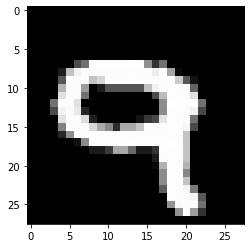

In [22]:
# Visualizing the predictions
plt.imshow(X[0].view(28, 28), cmap='gray')
plt.show()

In [23]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(9)


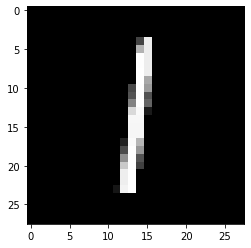

In [24]:
plt.imshow(X[1].view(28, 28), cmap='gray')
plt.show()

In [25]:
print(torch.argmax(net(X[1].view(-1, 28*28))[0]))

tensor(1)


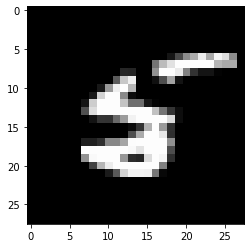

In [26]:
plt.imshow(X[2].view(28, 28), cmap='gray')

In [27]:
print(torch.argmax(net(X[2].view(-1, 28*28))[0]))

tensor(5)


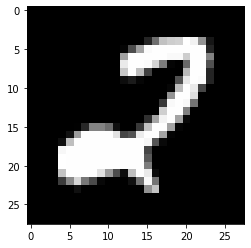

In [28]:
plt.imshow(X[3].view(28, 28), cmap='gray')

In [29]:
print(torch.argmax(net(X[3].view(-1, 28*28))[0]))

tensor(2)


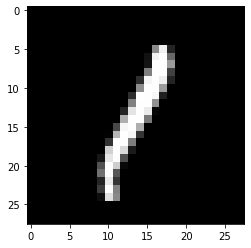

In [31]:
plt.imshow(X[5].view(28, 28), cmap='gray')
plt.show()

In [32]:
print(torch.argmax(net(X[5].view(-1, 28*28))[0]))

tensor(1)
